# TEXT CLASSIFICATION

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


In [2]:
#load the dataFrame from a CSV file
df=pd.read_csv('Emotions_training.csv')
df

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


# Data(Text) Preprocessing

Data Preprocessing is the process of detecting and correcting inaccurate records from a dataset and refers to identifying incorrect, incomplete, irrelevant parts of the data and then modifying, replacing, or deleting the dirty data. 

In [3]:
#handles missing values in the 'text' column
df.dropna(subset=['text'], inplace=True)

# Lower Case

In [4]:
#convert the 'text' column to lower case
df['text'] = df['text'].str.lower()

# Remove Links

In [5]:
#to remove URL links using regular expressions
def remove_links(text):
    return re.sub(r'http\S+', '', text)

#apply the function to 'content' column
df['text'] = df['text'].apply(remove_links) 

# Remove next lines(\n)

In [7]:
#to remove newline characters from the 'text' column
df['text'] = df['text'].str.replace('\n', '') 

# Words containing numbers

In [8]:
#to remove words containing digits from the 'text' column using apply() method and lambda function
df['text'] = df['text'].apply(lambda x: ' '.join(word for word in str(x).split() if not re.match('.*\d.*', str(word))))


# Extra spaces

In [9]:
#to remove extra spaces from the 'text' column using resub() and lambda function
df['text'] = df['text'].apply(lambda x: re.sub(r'\s+', ' ', x)) 

# Special Characters

In [10]:
#to remove special characters using regular expression
df['text'] = df['text'].str.replace(r'[^a-z\s]', '', regex=True)

# Removal of stop words

In [11]:
nltk.download('stopwords')

#stopwords for English language
stop_words = set(stopwords.words('english'))

#function to remove stop words from text
def remove_stopwords(text):
    #tokenize the text into words
    words = text.split()
    #to remove stop words from the list of words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    #to join the filtered words back into a sentence
    filtered_text = ' '.join(filtered_words)
    return filtered_text

#apply the function to the 'content' column 
df['text'] = df['text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to C:\Users\Moulya
[nltk_data]     R\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Stemming

In [12]:
#importing the PorterStemmer class from nltk
from nltk.stem import PorterStemmer

#initializing porter stemmer
porter_stemmer = PorterStemmer()

#to apply stemming to a given text
def apply_stemming(text):
    words = text.split()  #tokenize the text into words
    stemmed_words = [porter_stemmer.stem(word) for word in words]  #apply stemming to each word
    stemmed_text = ' '.join(stemmed_words)  #join the stemmed words back into a sentence
    return stemmed_text
    
#applying function to the 'content' column 
df['text'] = df['text'].apply(apply_stemming)

# Lemmatization

In [14]:
#importing the WordNetLemmatizer class from nltk
from nltk.stem import WordNetLemmatizer

#initializing the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

def apply_lemmatization(text):
    words = text.split()  # Tokenize the text into words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]  # Apply lemmatization to each word
    lemmatized_text = ' '.join(lemmatized_words)  # Join the lemmatized words back into a sentence
    return lemmatized_text
    
#apply function to the 'content' column 
df['text'] = df['text'].apply(apply_lemmatization)
df

,text,label
0,didnt feel humili,0
1,go feel hopeless damn hope around someon care ...,0
2,im grab minut post feel greedi wrong,3
3,ever feel nostalg fireplac know still properti,2
4,feel grouchi,3
...,...,...
15995,brief time beanbag said anna feel like beaten,0
15996,turn feel pathet still wait tabl sub teach degre,0
15997,feel strong good overal,1
15998,feel like rude comment im glad,3


# Eliminating features with extremely low frequency

In [15]:
from collections import Counter

#count word frequencies
word_counter = Counter()
for tokens in df['text']:
    word_counter.update(tokens)

#define the minimum frequency threshold
min_freq = 10

#filter out low-frequency words
def filter_low_freq_words(tokens, word_counter, min_freq):
    return [word for word in tokens if word_counter[word] >= min_freq]

#apply the filtering function to the text column
df['filtered_text'] = df['text'].apply(lambda x: filter_low_freq_words(x, word_counter, min_freq))

print(df)



                                                    text  label  \
0                                      didnt feel humili      0   
1      go feel hopeless damn hope around someon care ...      0   
2                   im grab minut post feel greedi wrong      3   
3         ever feel nostalg fireplac know still properti      2   
4                                           feel grouchi      3   
...                                                  ...    ...   
15995      brief time beanbag said anna feel like beaten      0   
15996   turn feel pathet still wait tabl sub teach degre      0   
15997                            feel strong good overal      1   
15998                     feel like rude comment im glad      3   
15999                       know lot feel stupid portray      0   

                                           filtered_text  
0      [d, i, d, n, t,  , f, e, e, l,  , h, u, m, i, ...  
1      [g, o,  , f, e, e, l,  , h, o, p, e, l, e, s, ...  
2      [i, m,  , g

# Use Complex Features: n-grams and part of speech tags

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

#necessary NLTK data packages are downloaded
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

#minimum frequency threshold
min_freq = 2

#tokenize, POS tag, and generate n-grams
def process_text(text, min_freq):
    tokens = word_tokenize(text.lower())
    # POS tagging
    pos_tags = pos_tag(tokens)
    
    # Generate 1-grams and 2-grams
    all_ngrams = tokens + [' '.join(gram) for gram in ngrams(tokens, 2)]
    
    return all_ngrams, pos_tags

#apply the text processing function
df['ngrams'], df['pos_tags'] = zip(*df['text'].apply(lambda x: process_text(x, min_freq)))

#flatten the n-grams list to count frequencies
all_ngrams = [ngram for sublist in df['ngrams'] for ngram in sublist]
ngram_counter = Counter(all_ngrams)

#filter based on frequency
def filter_ngrams(ngrams, ngram_counter, min_freq):
    return [ngram for ngram in ngrams if ngram_counter[ngram] >= min_freq]

#apply filtering function to n-grams
df['filtered_ngrams'] = df['ngrams'].apply(lambda x: filter_ngrams(x, ngram_counter, min_freq))

# Print
print(df[['text', 'filtered_ngrams', 'pos_tags']])


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Moulya R\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to C:\Users\Moulya
[nltk_data]     R\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                    text  \
0                                      didnt feel humili   
1      go feel hopeless damn hope around someon care ...   
2                   im grab minut post feel greedi wrong   
3         ever feel nostalg fireplac know still properti   
4                                           feel grouchi   
...                                                  ...   
15995      brief time beanbag said anna feel like beaten   
15996   turn feel pathet still wait tabl sub teach degre   
15997                            feel strong good overal   
15998                     feel like rude comment im glad   
15999                       know lot feel stupid portray   

                                         filtered_ngrams  \
0         [didnt, feel, humili, didnt feel, feel humili]   
1      [go, feel, hopeless, damn, hope, around, someo...   
2      [im, grab, minut, post, feel, greedi, wrong, m...   
3      [ever, feel, nostalg, fireplac, 

# Determine if the dataset is balanced or imbalanced

In [17]:
#define the Emotions dictionary
Emotions = {0: "sadness", 1: "joy", 2: "love", 3: "anger", 4: "fear", 5: "surprise"}

#display dataset
print("Dataset:")
print(df)

#distribution of the 'label' column
label_counts = df['label'].value_counts()

#map numerical labels to emotion names
df['label'] = df['label'].map(Emotions)

#check the distribution of the 'label' column
label_counts = df['label'].value_counts()

#display the label distribution
print("\nLabel Distribution:")
print(label_counts)

#let's define a threshold to consider a dataset as balanced
#if the largest class is less than 1.5 times the size of the smallest class, we consider it balanced

threshold = 1.5

#calculate the ratio of the largest class to the smallest class
max_count = label_counts.max()
min_count = label_counts.min()
balance_ratio = max_count / min_count

print("\nBalance Ratio:", balance_ratio)

if balance_ratio <= threshold:
    print("\nThe 'label' column is balanced.")
else:
    print("\nThe 'label' column is imbalanced.")

Dataset:
                                                    text  label  \
0                                      didnt feel humili      0   
1      go feel hopeless damn hope around someon care ...      0   
2                   im grab minut post feel greedi wrong      3   
3         ever feel nostalg fireplac know still properti      2   
4                                           feel grouchi      3   
...                                                  ...    ...   
15995      brief time beanbag said anna feel like beaten      0   
15996   turn feel pathet still wait tabl sub teach degre      0   
15997                            feel strong good overal      1   
15998                     feel like rude comment im glad      3   
15999                       know lot feel stupid portray      0   

                                           filtered_text  \
0      [d, i, d, n, t,  , f, e, e, l,  , h, u, m, i, ...   
1      [g, o,  , f, e, e, l,  , h, o, p, e, l, e, s, ...   
2     

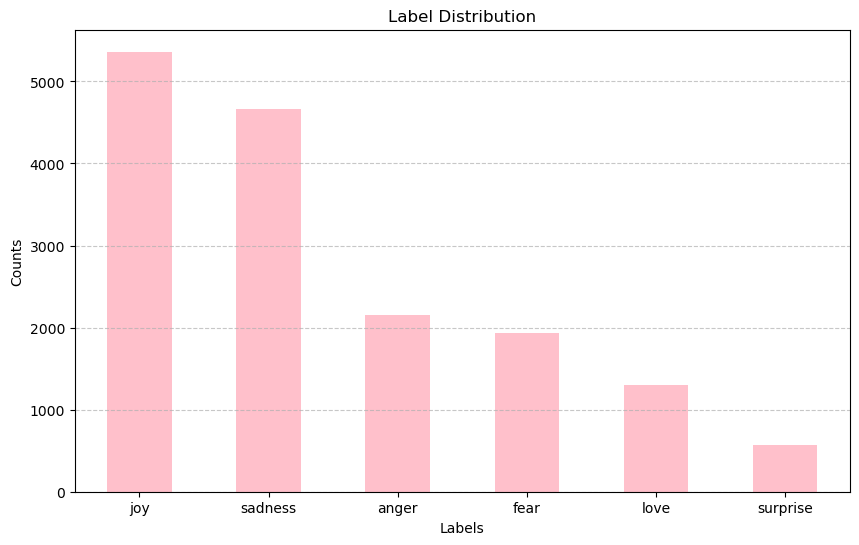

In [18]:
#to check the distribution of 'label' column
label_counts = df['label'].value_counts()

import matplotlib.pyplot as plt
#representing in bar graph
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='pink')
plt.title('Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.xticks(rotation=0) # Rotates the labels on x-axis to 0 degrees for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Hence, the "Emotions_training" dataset is imbalanced. 
Imbalanced data brings challenges in class separation, evaluation and results in poor model performance. To address a class imbalance, resampling techniques like oversampling minority classes help balance the dataset.

In [19]:
from imblearn.over_sampling import RandomOverSampler

#display dataset
print("Dataset:")
print(df)

X = df[['text']]
y = df['label']

#oversample the minority classes
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

#new DataFrame with the resampled data
df_resampled = pd.DataFrame(X_resampled, columns=['text'])
df_resampled['label'] = y_resampled

#balanced label distribution
print("\nBalanced Label Distribution:")
print(df_resampled['label'].value_counts())


Dataset:
                                                    text    label  \
0                                      didnt feel humili  sadness   
1      go feel hopeless damn hope around someon care ...  sadness   
2                   im grab minut post feel greedi wrong    anger   
3         ever feel nostalg fireplac know still properti     love   
4                                           feel grouchi    anger   
...                                                  ...      ...   
15995      brief time beanbag said anna feel like beaten  sadness   
15996   turn feel pathet still wait tabl sub teach degre  sadness   
15997                            feel strong good overal      joy   
15998                     feel like rude comment im glad    anger   
15999                       know lot feel stupid portray  sadness   

                                           filtered_text  \
0      [d, i, d, n, t,  , f, e, e, l,  , h, u, m, i, ...   
1      [g, o,  , f, e, e, l,  , h, o, p, e

Oversamples the minority classes in the dataset using Random OverSampling (ROS) from the imbalanced-learn library. After oversampling, it creates a new DataFrame with the resampled data and displays the balanced label distribution.

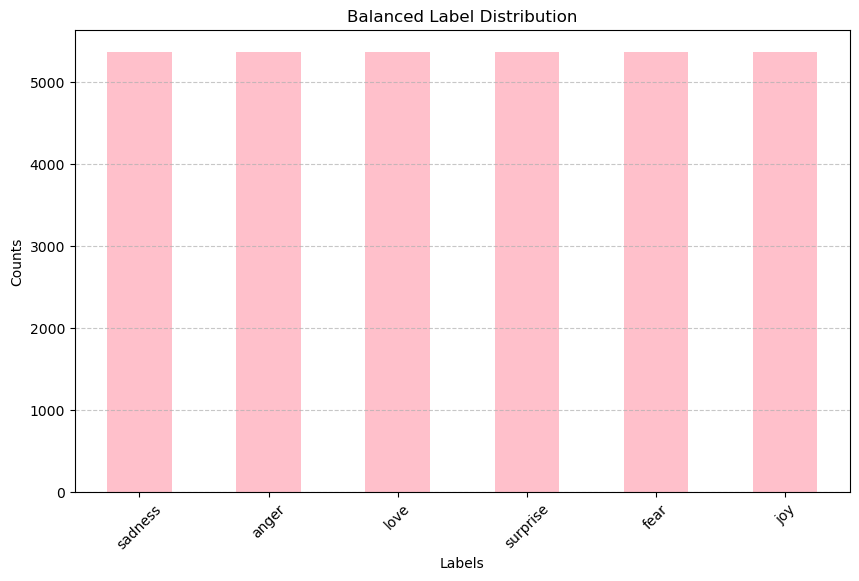

In [22]:
#plot a bar graph for the balanced label distribution

plt.figure(figsize=(10, 6))
df_resampled['label'].value_counts().plot(kind='bar', color='pink')
plt.title('Balanced Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Balancing a dataset makes training a model easier because it helps prevent the model from becoming biased towards one class.

# Featuring Engineering : Using Tf-IDF

TF-IDF (Term Frequency-Inverse Document Frequency) vectorization method used in text classification to transform text data into numerical representations that can be effectively used by machine algorithms.

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

#create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

#fit the vectorizer to the text data and transform it into a TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(df_resampled['text'])

#convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

#display the TF-IDF matrix
print("TF-IDF Matrix")
print(tfidf_df)

TF-IDF Matrix
        aa  aaaaaaand  aaaaand  aaaand  aac  aahhh  aaron   ab  abandon  abat  \
0      0.0        0.0      0.0     0.0  0.0    0.0    0.0  0.0      0.0   0.0   
1      0.0        0.0      0.0     0.0  0.0    0.0    0.0  0.0      0.0   0.0   
2      0.0        0.0      0.0     0.0  0.0    0.0    0.0  0.0      0.0   0.0   
3      0.0        0.0      0.0     0.0  0.0    0.0    0.0  0.0      0.0   0.0   
4      0.0        0.0      0.0     0.0  0.0    0.0    0.0  0.0      0.0   0.0   
...    ...        ...      ...     ...  ...    ...    ...  ...      ...   ...   
32167  0.0        0.0      0.0     0.0  0.0    0.0    0.0  0.0      0.0   0.0   
32168  0.0        0.0      0.0     0.0  0.0    0.0    0.0  0.0      0.0   0.0   
32169  0.0        0.0      0.0     0.0  0.0    0.0    0.0  0.0      0.0   0.0   
32170  0.0        0.0      0.0     0.0  0.0    0.0    0.0  0.0      0.0   0.0   
32171  0.0        0.0      0.0     0.0  0.0    0.0    0.0  0.0      0.0   0.0   

       ...  z

# SMOTE (Synthetic Minority Over-sampling Technique)

SMOTE is specifically designed to tackle imbalanced datasets by generating synthetic samples for the minority class.

In [27]:
from imblearn.over_sampling import SMOTE

#apply SMOTE to the TF-IDF matrix
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(tfidf_matrix, df_resampled['label'])

This code segment applies the Synthetic Minority Over-sampling Technique(SMOTE) to the TF-IDF matrix representing text data to address class imbalance. 

In [32]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

#create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

#fit the vectorizer to the text data and transform it into a TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(df_resampled['text'])

#apply SMOTE to the TF-IDF matrix (text data)
smote_text = SMOTE()
X_resampled_text, y_resampled_text = smote_text.fit_resample(tfidf_matrix, df_resampled['label'])

#convert the resampled TF-IDF matrix back to a DataFrame (optional)
resampled_text_df = pd.DataFrame(X_resampled_text.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
resampled_text_df['label'] = y_resampled_text

#count the occurrences of each label in the resampled label column
label_counts_resampled = pd.Series(y_resampled_text).value_counts()

#display the resampled label distribution
print("\nResampled Label Distribution:")
print(label_counts_resampled)

#Now resampled text data along with the label column stored in resampled_text_df DataFrame



Resampled Label Distribution:
label
sadness     5362
anger       5362
love        5362
surprise    5362
fear        5362
joy         5362
Name: count, dtype: int64


# Model Building :

Divide the dataset in to Train(70%), Test(20%) and Validation(10%) datasets.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

#create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

#fit the vectorizer to the text data and transform it into a TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(df_resampled['text'])

#apply SMOTE to the TF-IDF matrix (text data)
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(tfidf_matrix, df_resampled['label'])

#split the dataset into 70% training and 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

#split the temp dataset into 20% testing and 10% validation
X_test, X_validation, y_test, y_validation = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

#display the shapes of the training, testing, and validation sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)
print("Validation set shape:", X_validation.shape, y_validation.shape)


Training set shape: (22520, 10321) (22520,)
Testing set shape: (6466, 10321) (6466,)
Validation set shape: (3186, 10321) (3186,)


# Classification Models :

# Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#create and train the logistic regression model on the training set
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

#predict labels for the training set
y_train_pred = logistic_model.predict(X_train)

#training classification report
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

#predict labels for the testing set
y_test_pred = logistic_model.predict(X_test)

#testing classification report
print("\nTesting Classification Report:")
print(classification_report(y_test, y_test_pred))

from sklearn.metrics import accuracy_score

#calculate and display the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

#calculate and display the testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)


Training Classification Report:
              precision    recall  f1-score   support

       anger       0.96      0.97      0.96      3771
        fear       0.97      0.95      0.96      3772
         joy       0.96      0.90      0.93      3753
        love       0.93      0.98      0.95      3719
     sadness       0.96      0.94      0.95      3721
    surprise       0.96      1.00      0.98      3784

    accuracy                           0.96     22520
   macro avg       0.96      0.96      0.96     22520
weighted avg       0.96      0.96      0.96     22520


Testing Classification Report:
              precision    recall  f1-score   support

       anger       0.93      0.95      0.94      1058
        fear       0.96      0.91      0.94      1072
         joy       0.91      0.87      0.89      1093
        love       0.90      0.96      0.93      1095
     sadness       0.94      0.88      0.91      1080
    surprise       0.94      1.00      0.97      1068

    accuracy 


Confusion Matrix for Training Data:
[[3655   23   11   22   50   10]
 [  42 3592   17   12   21   88]
 [  40   30 3379  205   52   47]
 [  13    5   56 3636    6    3]
 [  70   56   39   35 3495   26]
 [   0    0    5    0    0 3779]]

Confusion Matrix for Testing Data:
[[1010    9    8    9   20    2]
 [  21  977   14    4   11   45]
 [  13    5  954   79   27   15]
 [   6    1   32 1047    4    5]
 [  36   23   41   26  948    6]
 [   0    0    1    0    0 1067]]


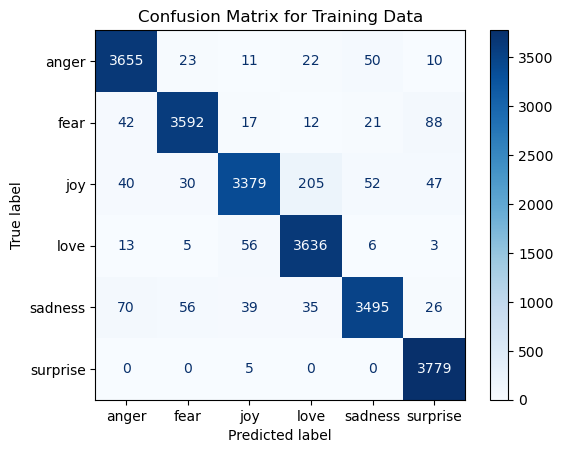

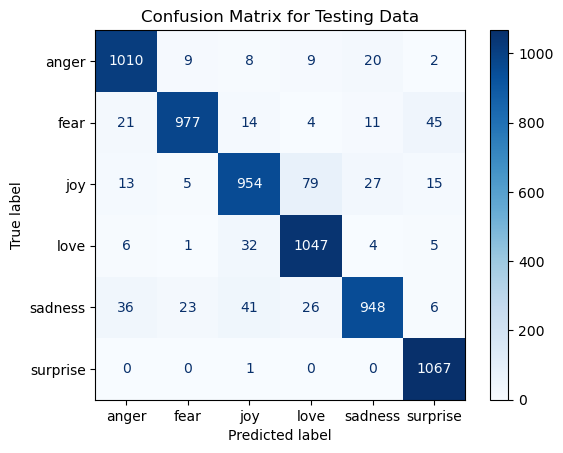

In [47]:
#confusion matrix for training data
cm_train = confusion_matrix(y_train, y_train_pred)
print("\nConfusion Matrix for Training Data:")
print(cm_train)

#confusion matrix for testing data
cm_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix for Testing Data:")
print(cm_test)

#visualize confusion matrix for training data
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=logistic_model.classes_)
disp_train.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Training Data')
plt.show()

#visualize confusion matrix for testing data
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=logistic_model.classes_)
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Testing Data')
plt.show()


# Hyper Parameter Tuning for Logistic Regression

In [53]:
#define the parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10]
}

#initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

#initialize GridSearchCV
grid_search = GridSearchCV(logistic_model, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)

#perform grid search
grid_search.fit(X_train, y_train)

#get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

#get the best model
best_model = grid_search.best_estimator_

#make predictions on the training set using the best model
y_train_pred = best_model.predict(X_train)

#make predictions on the testing set using the best model
y_test_pred = best_model.predict(X_test)

#calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

#calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy:.4f}")

#best cross-validated accuracy from GridSearchCV
best_cv_accuracy = grid_search.best_score_
print(f"Best Cross-Validated Accuracy from GridSearchCV: {best_cv_accuracy:.4f}")

#generate classification report for training data
report_train = classification_report(y_train, y_train_pred)
print("\nClassification Report for Training Data:")
print(report_train)

#generate classification report for testing data
report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report for Testing Data:")
print(report_test)

#generate confusion matrix for training data
cm_train = confusion_matrix(y_train, y_train_pred)
print("\nConfusion Matrix for Training Data:")
print(cm_train)

#generate confusion matrix for testing data
cm_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix for Testing Data:")
print(cm_test)


Best Parameters: {'C': 10}
Training Accuracy: 0.9888
Testing Accuracy: 0.9434
Best Cross-Validated Accuracy from GridSearchCV: 0.9341

Classification Report for Training Data:
              precision    recall  f1-score   support

       anger       0.99      0.99      0.99      3771
        fear       0.99      0.99      0.99      3772
         joy       0.99      0.97      0.98      3753
        love       0.98      1.00      0.99      3719
     sadness       0.99      0.99      0.99      3721
    surprise       0.99      1.00      1.00      3784

    accuracy                           0.99     22520
   macro avg       0.99      0.99      0.99     22520
weighted avg       0.99      0.99      0.99     22520


Classification Report for Testing Data:
              precision    recall  f1-score   support

       anger       0.94      0.96      0.95      1058
        fear       0.97      0.95      0.96      1072
         joy       0.93      0.88      0.90      1093
        love       0.92

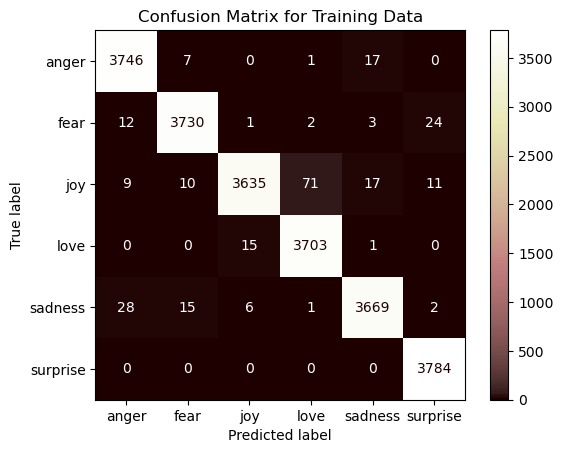

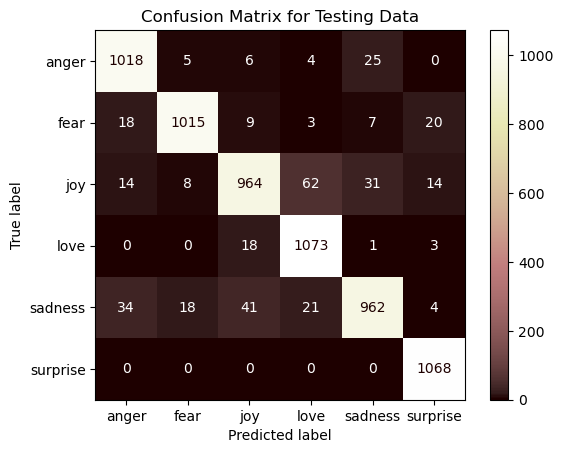

In [55]:
#visualize confusion matrix for training data
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=best_model.classes_)
disp_train.plot(cmap=plt.cm.pink)
plt.title('Confusion Matrix for Training Data')
plt.show()

#visualize confusion matrix for testing data
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=best_model.classes_)
disp_test.plot(cmap=plt.cm.pink)
plt.title('Confusion Matrix for Testing Data')
plt.show()

# Naive Bayes

In [57]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

#create and train the Naive Bayes model on the training set
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

#predict labels for the training set
y_train_pred = naive_bayes_model.predict(X_train)

#training classification report
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

#predict labels for the testing set
y_test_pred = naive_bayes_model.predict(X_test)

#testing classification report
print("\nTesting Classification Report:")
print(classification_report(y_test, y_test_pred))


Training Classification Report:
              precision    recall  f1-score   support

       anger       0.95      0.94      0.95      3771
        fear       0.94      0.94      0.94      3772
         joy       0.95      0.86      0.90      3753
        love       0.91      0.96      0.93      3719
     sadness       0.94      0.91      0.93      3721
    surprise       0.92      0.99      0.95      3784

    accuracy                           0.93     22520
   macro avg       0.93      0.93      0.93     22520
weighted avg       0.93      0.93      0.93     22520


Testing Classification Report:
              precision    recall  f1-score   support

       anger       0.90      0.90      0.90      1058
        fear       0.91      0.89      0.90      1072
         joy       0.89      0.77      0.83      1093
        love       0.85      0.93      0.89      1095
     sadness       0.90      0.83      0.87      1080
    surprise       0.87      1.00      0.93      1068

    accuracy 

In [58]:
from sklearn.metrics import accuracy_score

#calculate and display the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

#calculate and display the testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.9338365896980462
Testing Accuracy: 0.8864831425920198



Confusion Matrix for Training Data:
[[3556   51   27   39   70   28]
 [  37 3539   17   17   36  126]
 [  50   59 3220  256   71   97]
 [  21    9   87 3561   21   20]
 [  82   75   47   48 3392   77]
 [   0   16    5    1    0 3762]]

Confusion Matrix for Testing Data:
[[ 955   26   16   22   29   10]
 [  14  954    6   13   23   62]
 [  27   34  847  105   37   43]
 [   9    4   46 1014    9   13]
 [  53   31   41   31  899   25]
 [   0    3    1    1    0 1063]]


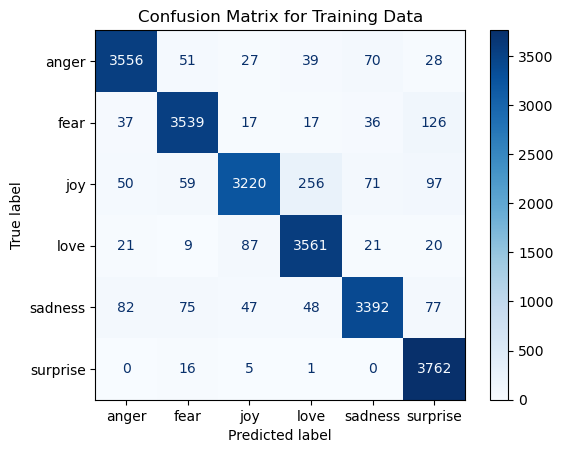

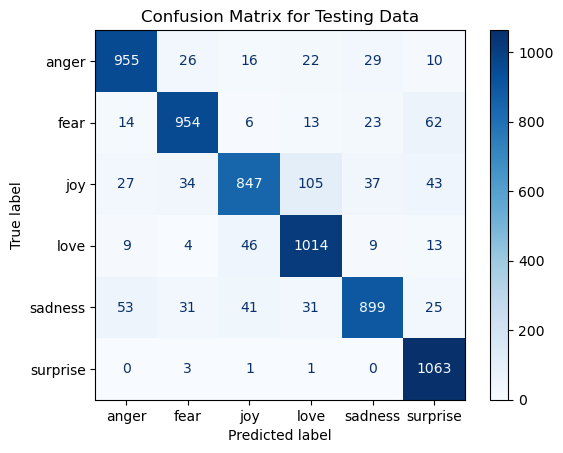

In [59]:
#generate confusion matrix for training data
cm_train = confusion_matrix(y_train, y_train_pred)
print("\nConfusion Matrix for Training Data:")
print(cm_train)

#generate confusion matrix for testing data
cm_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix for Testing Data:")
print(cm_test)

#visualize confusion matrix for training data
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=naive_bayes_model.classes_)
disp_train.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Training Data')
plt.show()

#visualize confusion matrix for testing data
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=naive_bayes_model.classes_)
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Testing Data')
plt.show()


# Hyper Parameter Tuning for Naive Bayes

In [60]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#define the parameter grid for Naive Bayes
param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0]  # Smoothing parameter
}

#initialize the Naive Bayes model
naive_bayes_model = MultinomialNB()

#initialize GridSearchCV
grid_search = GridSearchCV(naive_bayes_model, param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1)

#perform grid search
grid_search.fit(X_train, y_train)

#get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

#get the best model
best_model = grid_search.best_estimator_

#make predictions on the training set using the best model
y_train_pred = best_model.predict(X_train)

#make predictions on the testing set using the best model
y_test_pred = best_model.predict(X_test)

#calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

#calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy:.4f}")

#best cross-validated accuracy from GridSearchCV
best_cv_accuracy = grid_search.best_score_
print(f"Best Cross-Validated Accuracy from GridSearchCV: {best_cv_accuracy:.4f}")

#classification report for training data
report_train = classification_report(y_train, y_train_pred)
print("\nClassification Report for Training Data:")
print(report_train)

#classification report for testing data
report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report for Testing Data:")
print(report_test)

#confusion matrix for training data
cm_train = confusion_matrix(y_train, y_train_pred)
print("\nConfusion Matrix for Training Data:")
print(cm_train)

#confusion matrix for testing data
cm_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix for Testing Data:")
print(cm_test)

Best Parameters: {'alpha': 0.5}
Training Accuracy: 0.9413
Testing Accuracy: 0.8871
Best Cross-Validated Accuracy from GridSearchCV: 0.8755

Classification Report for Training Data:
              precision    recall  f1-score   support

       anger       0.95      0.95      0.95      3771
        fear       0.95      0.94      0.95      3772
         joy       0.95      0.88      0.91      3753
        love       0.92      0.96      0.94      3719
     sadness       0.95      0.93      0.94      3721
    surprise       0.93      1.00      0.96      3784

    accuracy                           0.94     22520
   macro avg       0.94      0.94      0.94     22520
weighted avg       0.94      0.94      0.94     22520


Classification Report for Testing Data:
              precision    recall  f1-score   support

       anger       0.90      0.90      0.90      1058
        fear       0.90      0.89      0.89      1072
         joy       0.88      0.78      0.83      1093
        love      

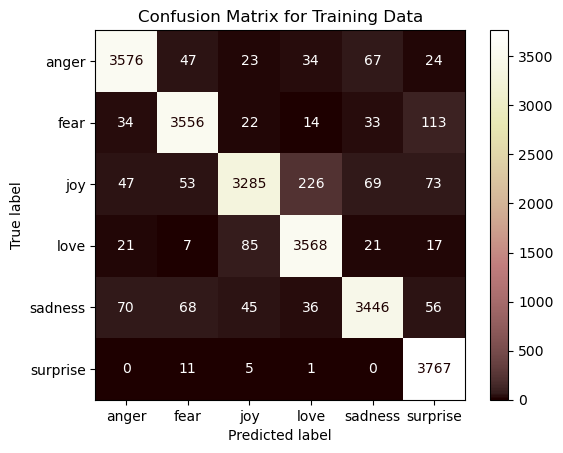

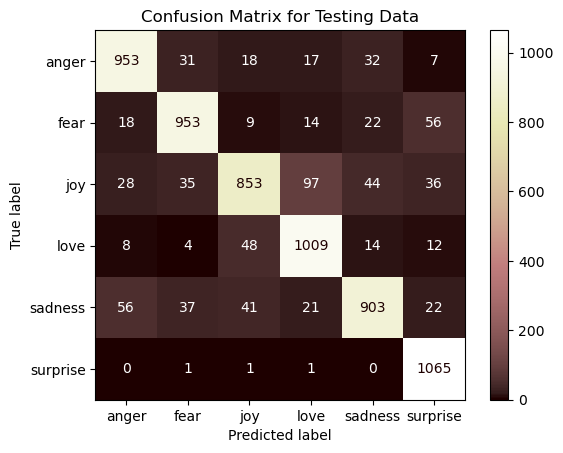

In [61]:
#visualize confusion matrix for training data
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=best_model.classes_)
disp_train.plot(cmap=plt.cm.pink)
plt.title('Confusion Matrix for Training Data')
plt.show()

#visualize confusion matrix for testing data
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=best_model.classes_)
disp_test.plot(cmap=plt.cm.pink)
plt.title('Confusion Matrix for Testing Data')
plt.show()


# Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

#create and train the Random Forest model on the training set
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

#predict labels for the training set
y_train_pred = random_forest_model.predict(X_train)

#training classification report
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

#predict labels for the testing set
y_test_pred = random_forest_model.predict(X_test)

#testing classification report
print("\nTesting Classification Report:")
print(classification_report(y_test, y_test_pred))


Training Classification Report:
              precision    recall  f1-score   support

       anger       1.00      1.00      1.00      3771
        fear       1.00      1.00      1.00      3772
         joy       1.00      1.00      1.00      3753
        love       1.00      1.00      1.00      3719
     sadness       1.00      1.00      1.00      3721
    surprise       1.00      1.00      1.00      3784

    accuracy                           1.00     22520
   macro avg       1.00      1.00      1.00     22520
weighted avg       1.00      1.00      1.00     22520


Testing Classification Report:
              precision    recall  f1-score   support

       anger       0.93      0.98      0.95      1058
        fear       0.96      0.96      0.96      1072
         joy       0.94      0.84      0.89      1093
        love       0.89      0.99      0.94      1095
     sadness       0.95      0.86      0.90      1080
    surprise       0.96      1.00      0.98      1068

    accuracy 

In [63]:
from sklearn.metrics import accuracy_score

#calculate and display the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

#calculate and display the testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9984014209591474
Testing Accuracy: 0.9373646767708012


# Hyper Parameter Tuning for Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#simplified parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100],  # Number of trees in the forest
    'max_depth': [10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5]  # Minimum number of samples required to split an internal node
}

#initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

#initialize GridSearchCV
grid_search = GridSearchCV(random_forest_model, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

#perform grid search
grid_search.fit(X_train, y_train)

#get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

#get the best model
best_model = grid_search.best_estimator_

#make predictions on the training set using the best model
y_train_pred = best_model.predict(X_train)

#make predictions on the testing set using the best model
y_test_pred = best_model.predict(X_test)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy:.4f}")

#best cross-validated accuracy from GridSearchCV
best_cv_accuracy = grid_search.best_score_
print(f"Best Cross-Validated Accuracy from GridSearchCV: {best_cv_accuracy:.4f}")

#classification report for training data
report_train = classification_report(y_train, y_train_pred)
print("\nClassification Report for Training Data:")
print(report_train)

#classification report for testing data
report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report for Testing Data:")
print(report_test)

#confusion matrix for training data
cm_train = confusion_matrix(y_train, y_train_pred)
print("\nConfusion Matrix for Training Data:")
print(cm_train)

#confusion matrix for testing data
cm_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix for Testing Data:")
print(cm_test)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Training Accuracy: 0.8936
Testing Accuracy: 0.8681
Best Cross-Validated Accuracy from GridSearchCV: 0.8551

Classification Report for Training Data:
              precision    recall  f1-score   support

       anger       0.92      0.91      0.91      3771
        fear       0.97      0.87      0.92      3772
         joy       0.77      0.85      0.80      3753
        love       0.86      0.93      0.89      3719
     sadness       0.96      0.81      0.88      3721
    surprise       0.92      0.99      0.95      3784

    accuracy                           0.89     22520
   macro avg       0.90      0.89      0.89     22520
weighted avg       0.90      0.89      0.89     22520


Classification Report for Testing Data:
              precision    recall  f1-score   support

       anger       0.90      0.90      0.90      1058
        fear       0.94      0.85      0.89      1072
         joy       0.74 

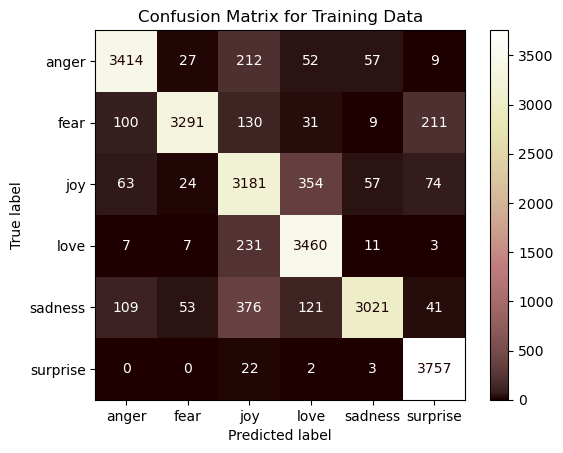

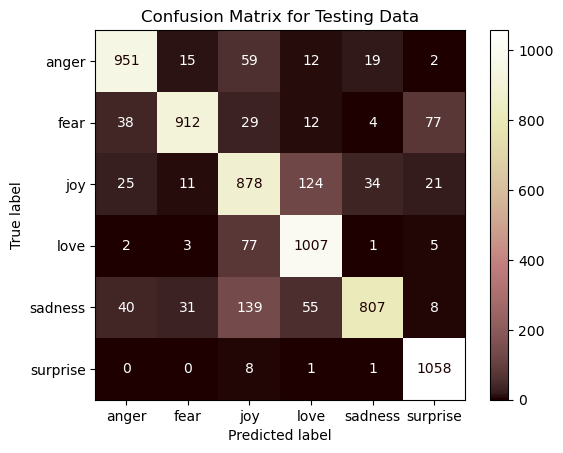

In [68]:
#visualize confusion matrix for training data
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=best_model.classes_)
disp_train.plot(cmap=plt.cm.pink)
plt.title('Confusion Matrix for Training Data')
plt.show()

#visualize confusion matrix for testing data
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=best_model.classes_)
disp_test.plot(cmap=plt.cm.pink)
plt.title('Confusion Matrix for Testing Data')
plt.show()


# XG Boost

In [72]:
from sklearn.preprocessing import LabelEncoder

#initialize LabelEncoder
label_encoder = LabelEncoder()

#encode the target labels into numeric format
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

#create and train the XGBoost model on the training set
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train_encoded)

#predict labels for the training set
y_train_pred = xgb_model.predict(X_train)

#training classification report
print("Training Classification Report:")
print(classification_report(y_train_encoded, y_train_pred))

#predict labels for the testing set
y_test_pred = xgb_model.predict(X_test)

#testing classification report
print("\nTesting Classification Report:")
print(classification_report(y_test_encoded, y_test_pred))

#calculate training accuracy
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

#calculate testing accuracy
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
print(f"Testing Accuracy: {test_accuracy:.4f}")

#confusion matrix for training data
cm_train = confusion_matrix(y_train_encoded, y_train_pred)
print("\nConfusion Matrix for Training Data:")
print(cm_train)

#confusion matrix for testing data
cm_test = confusion_matrix(y_test_encoded, y_test_pred)
print("\nConfusion Matrix for Testing Data:")
print(cm_test)

Training Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      3771
           1       0.97      0.96      0.96      3772
           2       0.97      0.89      0.92      3753
           3       0.92      0.99      0.96      3719
           4       0.98      0.93      0.95      3721
           5       0.96      1.00      0.98      3784

    accuracy                           0.96     22520
   macro avg       0.96      0.96      0.96     22520
weighted avg       0.96      0.96      0.96     22520


Testing Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1058
           1       0.95      0.92      0.93      1072
           2       0.93      0.85      0.89      1093
           3       0.89      0.97      0.93      1095
           4       0.96      0.86      0.91      1080
           5       0.93      1.00      0.96      1068

    accuracy 

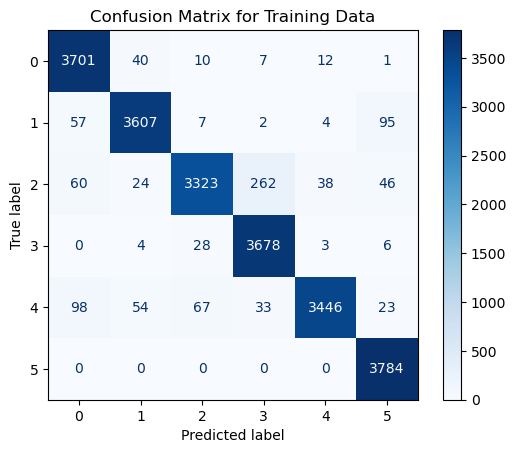

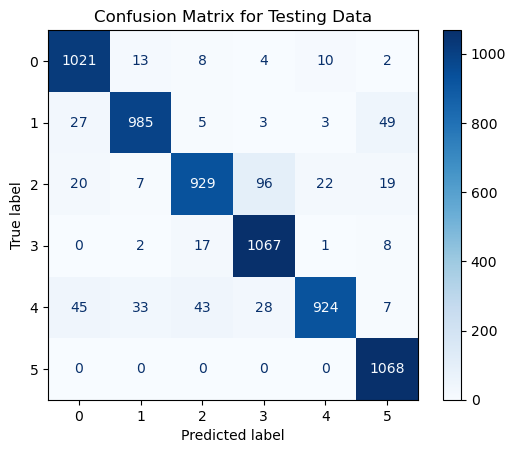

In [73]:
#visualize confusion matrix for training data
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=xgb_model.classes_)
disp_train.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Training Data')
plt.show()

#visualize confusion matrix for testing data
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=xgb_model.classes_)
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Testing Data')
plt.show()


# Hyper Parameter Tuning for XG Boost

In [80]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#initialize LabelEncoder
label_encoder = LabelEncoder()

#encode the target labels into numeric format
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

#define the parameter grid for XGBoost
param_grid_xgb = {
    'learning_rate': [0.1, 0.3],
    'max_depth': [3, 5],
    'min_child_weight': [1, 3],
}

#initialize the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

#initialize GridSearchCV
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)

#perform grid search
grid_search_xgb.fit(X_train, y_train_encoded)

#get the best parameters
best_params_xgb = grid_search_xgb.best_params_
print("Best Parameters:", best_params_xgb)

#get the best model
best_model_xgb = grid_search_xgb.best_estimator_

#make predictions on the training set using the best model
y_train_pred_xgb = best_model_xgb.predict(X_train)

#make predictions on the testing set using the best model
y_test_pred_xgb = best_model_xgb.predict(X_test)

#calculate training accuracy
train_accuracy_xgb = accuracy_score(y_train_encoded, y_train_pred_xgb)
print(f"Training Accuracy: {train_accuracy_xgb:.4f}")

#calculate testing accuracy
test_accuracy_xgb = accuracy_score(y_test_encoded, y_test_pred_xgb)
print(f"Testing Accuracy: {test_accuracy_xgb:.4f}")

#best cross-validated accuracy from GridSearchCV
best_cv_accuracy_xgb = grid_search_xgb.best_score_
print(f"Best Cross-Validated Accuracy from GridSearchCV: {best_cv_accuracy_xgb:.4f}")

#generate classification report for training data
report_train_xgb = classification_report(y_train_encoded, y_train_pred_xgb)
print("\nClassification Report for Training Data:")
print(report_train_xgb)

#generate classification report for testing data
report_test_xgb = classification_report(y_test_encoded, y_test_pred_xgb)
print("\nClassification Report for Testing Data:")
print(report_test_xgb)

#generate confusion matrix for training data
cm_train_xgb = confusion_matrix(y_train_encoded, y_train_pred_xgb)
print("\nConfusion Matrix for Training Data:")
print(cm_train_xgb)

#generate confusion matrix for testing data
cm_test_xgb = confusion_matrix(y_test_encoded, y_test_pred_xgb)
print("\nConfusion Matrix for Testing Data:")
print(cm_test_xgb)

Best Parameters: {'learning_rate': 0.3, 'max_depth': 5, 'min_child_weight': 1}
Training Accuracy: 0.9458
Testing Accuracy: 0.9179
Best Cross-Validated Accuracy from GridSearchCV: 0.9104

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      3771
           1       0.96      0.94      0.95      3772
           2       0.96      0.86      0.91      3753
           3       0.91      0.98      0.94      3719
           4       0.98      0.91      0.95      3721
           5       0.94      1.00      0.97      3784

    accuracy                           0.95     22520
   macro avg       0.95      0.95      0.95     22520
weighted avg       0.95      0.95      0.95     22520


Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1058
           1       0.94      0.89      0.91      1072
           2       0.92  

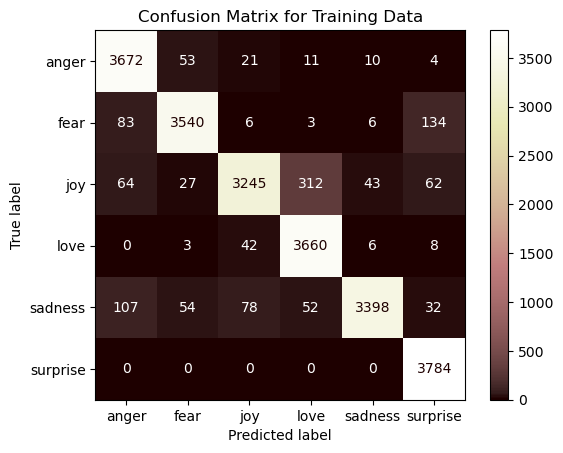

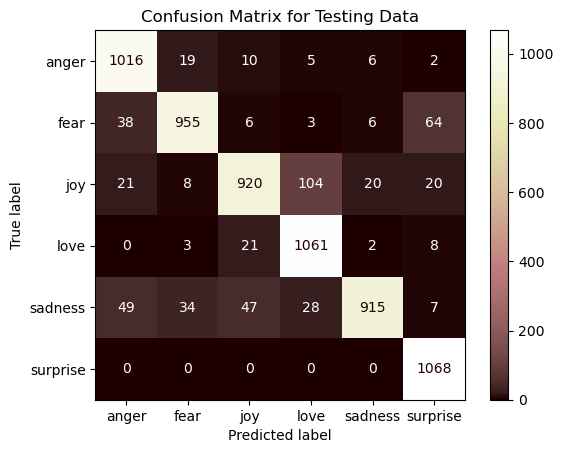

In [82]:
from sklearn.metrics import ConfusionMatrixDisplay

#visualize confusion matrix for training data
disp_train_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_train_xgb, display_labels=label_encoder.classes_)
disp_train_xgb.plot(cmap=plt.cm.pink)
plt.title('Confusion Matrix for Training Data')
plt.show()

#visualize confusion matrix for testing data
disp_test_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_test_xgb, display_labels=label_encoder.classes_)
disp_test_xgb.plot(cmap=plt.cm.pink)
plt.title('Confusion Matrix for Testing Data')
plt.show()

# SVM (Support Vector Machine)

In [85]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

#create and train the SVM model on the training set
svm_model = SVC()
svm_model.fit(X_train, y_train)

#predict labels for the training set
y_train_pred_svm = svm_model.predict(X_train)

#training classification report
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred_svm))

#predict labels for the testing set
y_test_pred_svm = svm_model.predict(X_test)

#testing classification report
print("\nTesting Classification Report:")
print(classification_report(y_test, y_test_pred_svm))

#calculate and display the training accuracy
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
print("Training Accuracy:", train_accuracy_svm)

#calculate and display the testing accuracy
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
print("Testing Accuracy:", test_accuracy_svm)


Training Classification Report:
              precision    recall  f1-score   support

       anger       0.99      1.00      1.00      3771
        fear       1.00      0.99      0.99      3772
         joy       1.00      0.98      0.99      3753
        love       0.99      1.00      0.99      3719
     sadness       1.00      0.99      0.99      3721
    surprise       0.99      1.00      1.00      3784

    accuracy                           0.99     22520
   macro avg       0.99      0.99      0.99     22520
weighted avg       0.99      0.99      0.99     22520


Testing Classification Report:
              precision    recall  f1-score   support

       anger       0.96      0.97      0.96      1058
        fear       0.98      0.95      0.96      1072
         joy       0.91      0.91      0.91      1093
        love       0.95      0.98      0.96      1095
     sadness       0.94      0.90      0.92      1080
    surprise       0.98      1.00      0.99      1068

    accuracy 


Confusion Matrix for Training Data:
[[3763    4    0    0    4    0]
 [   7 3748    0    0    3   14]
 [   2    6 3690   40    7    8]
 [   0    0    2 3717    0    0]
 [  15    5    4    2 3693    2]
 [   0    0    0    0    0 3784]]

Confusion Matrix for Testing Data:
[[1022    5   10    0   21    0]
 [  13 1022   17    1    9   10]
 [   8    3  998   46   28   10]
 [   0    0   18 1074    0    3]
 [  25   18   53   13  971    0]
 [   0    0    0    0    0 1068]]


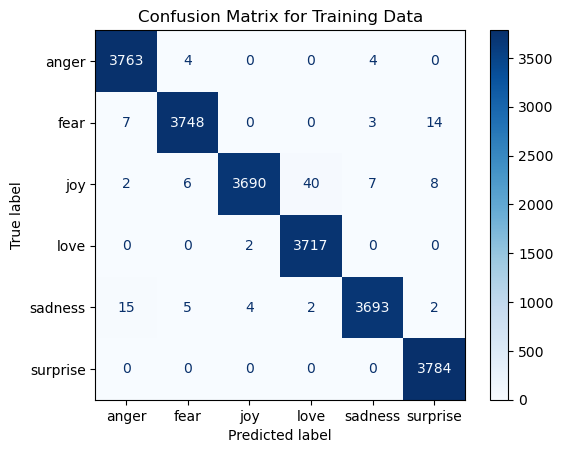

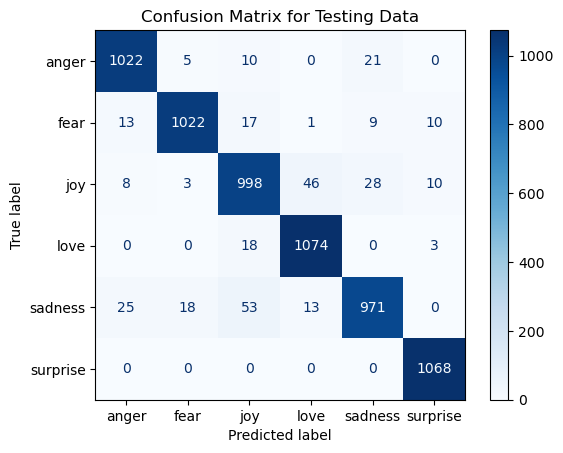

In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#generate confusion matrix for training data
cm_train_svm = confusion_matrix(y_train, y_train_pred_svm)
print("\nConfusion Matrix for Training Data:")
print(cm_train_svm)

#generate confusion matrix for testing data
cm_test_svm = confusion_matrix(y_test, y_test_pred_svm)
print("\nConfusion Matrix for Testing Data:")
print(cm_test_svm)

#visualize confusion matrix for training data
disp_train_svm = ConfusionMatrixDisplay(confusion_matrix=cm_train_svm, display_labels=svm_model.classes_)
disp_train_svm.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Training Data')
plt.show()

#visualize confusion matrix for testing data
disp_test_svm = ConfusionMatrixDisplay(confusion_matrix=cm_test_svm, display_labels=svm_model.classes_)
disp_test_svm.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Testing Data')
plt.show()


# Hyper Parameter Tuning for SVM (Support Vector Machine)

In [87]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

#initialize the SVM model
svm_model = SVC()

#initialize GridSearchCV
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)

#perform grid search
grid_search_svm.fit(X_train, y_train)

#get the best parameters
best_params_svm = grid_search_svm.best_params_
print("Best Parameters:", best_params_svm)

#get the best model
best_model_svm = grid_search_svm.best_estimator_

#make predictions on the training set using the best model
y_train_pred_svm = best_model_svm.predict(X_train)

#make predictions on the testing set using the best model
y_test_pred_svm = best_model_svm.predict(X_test)

#calculate training accuracy
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
print(f"Training Accuracy: {train_accuracy_svm:.4f}")

#calculate testing accuracy
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
print(f"Testing Accuracy: {test_accuracy_svm:.4f}")

#best cross-validated accuracy from GridSearchCV
best_cv_accuracy_svm = grid_search_svm.best_score_
print(f"Best Cross-Validated Accuracy from GridSearchCV: {best_cv_accuracy_svm:.4f}")

#generate classification report for training data
report_train_svm = classification_report(y_train, y_train_pred_svm)
print("\nClassification Report for Training Data:")
print(report_train_svm)

#generate classification report for testing data
report_test_svm = classification_report(y_test, y_test_pred_svm)
print("\nClassification Report for Testing Data:")
print(report_test_svm)

#generate confusion matrix for training data
cm_train_svm = confusion_matrix(y_train, y_train_pred_svm)
print("\nConfusion Matrix for Training Data:")
print(cm_train_svm)

#generate confusion matrix for testing data
cm_test_svm = confusion_matrix(y_test, y_test_pred_svm)
print("\nConfusion Matrix for Testing Data:")
print(cm_test_svm)


Best Parameters: {'C': 10, 'kernel': 'rbf'}
Training Accuracy: 0.9984
Testing Accuracy: 0.9552
Best Cross-Validated Accuracy from GridSearchCV: 0.9413

Classification Report for Training Data:
              precision    recall  f1-score   support

       anger       1.00      1.00      1.00      3771
        fear       1.00      1.00      1.00      3772
         joy       1.00      1.00      1.00      3753
        love       1.00      1.00      1.00      3719
     sadness       1.00      1.00      1.00      3721
    surprise       1.00      1.00      1.00      3784

    accuracy                           1.00     22520
   macro avg       1.00      1.00      1.00     22520
weighted avg       1.00      1.00      1.00     22520


Classification Report for Testing Data:
              precision    recall  f1-score   support

       anger       0.96      0.97      0.96      1058
        fear       0.98      0.96      0.97      1072
         joy       0.91      0.93      0.92      1093
      

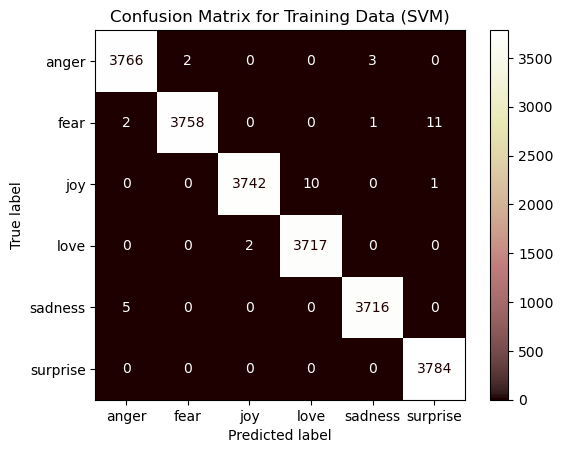

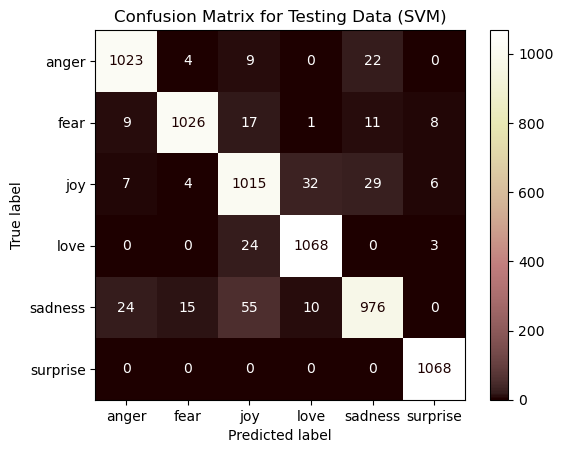

In [89]:
#visualize confusion matrix for training data
disp_train_svm = ConfusionMatrixDisplay(confusion_matrix=cm_train_svm, display_labels=best_model_svm.classes_)
disp_train_svm.plot(cmap=plt.cm.pink)
plt.title('Confusion Matrix for Training Data (SVM)')
plt.show()

#visualize confusion matrix for testing data
disp_test_svm = ConfusionMatrixDisplay(confusion_matrix=cm_test_svm, display_labels=best_model_svm.classes_)
disp_test_svm.plot(cmap=plt.cm.pink)
plt.title('Confusion Matrix for Testing Data (SVM)')
plt.show()


# Best Model 

In [93]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

#encode the target labels into numeric format
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

#initialize the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XG Boost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'SVM': SVC()
}

#initialize results dictionary
results = {
    'Model': [],
    'Training Accuracy': [],
    'Testing Accuracy': []
}

#train and evaluate each model
for model_name, model in models.items():
    if model_name == 'XG Boost':
        model.fit(X_train, y_train_encoded)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        train_acc = accuracy_score(y_train_encoded, y_train_pred)
        test_acc = accuracy_score(y_test_encoded, y_test_pred)
    else:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)

    results['Model'].append(model_name)
    results['Training Accuracy'].append(train_acc)
    results['Testing Accuracy'].append(test_acc)

#convert to DataFrame
results_df = pd.DataFrame(results)

#results
print(results_df)

                 Model  Training Accuracy  Testing Accuracy
0  Logistic Regression           0.956306          0.928395
1          Naive Bayes           0.933837          0.886483
2        Random Forest           0.998401          0.937365
3             XG Boost           0.956439          0.927003
4                  SVM           0.994449          0.951902


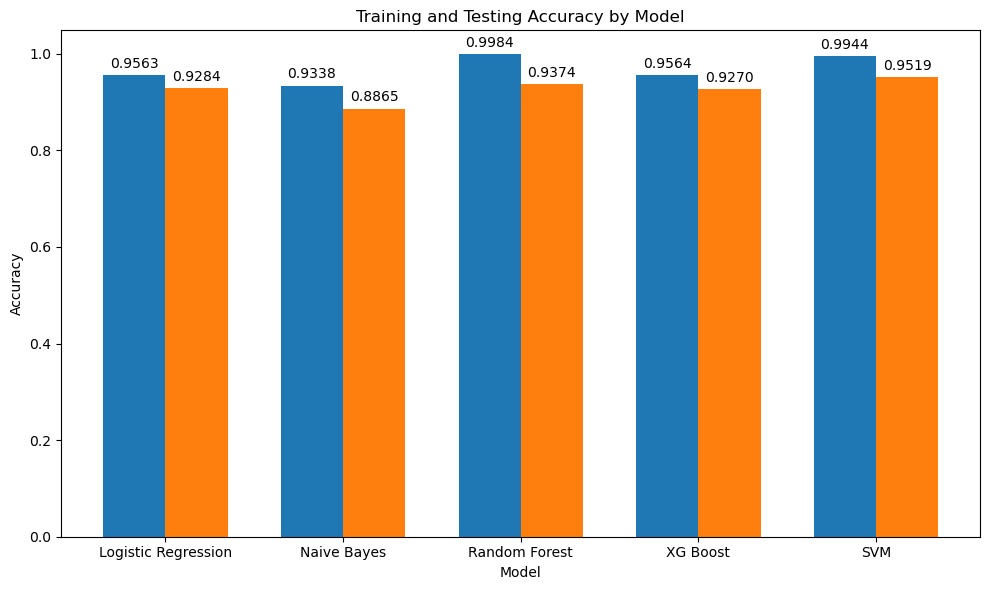

In [99]:
models = results_df['Model']
training_accuracy = results_df['Training Accuracy']
testing_accuracy = results_df['Testing Accuracy']

#bar graph
x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, training_accuracy, width, label='Training Accuracy')
rects2 = ax.bar(x + width/2, testing_accuracy, width, label='Testing Accuracy')

#add some text for labels, title and custom x-axis tick labels
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Training and Testing Accuracy by Model')
ax.set_xticks(x)
ax.set_xticklabels(models)

#text label above each bar in *rects*, displaying its height.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


By considering both Training and Testing, Let's assume SVM is the best model and let's create Validation Dataset for it.

# Validation on SVM (Support Vector Machine)

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

#split the dataset into training and temporary dataset
X_train_temp, X_val, y_train_temp, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#create and train the SVM model on the training set
svm_model = SVC()
svm_model.fit(X_train_temp, y_train_temp)

#predict labels for the training set
y_train_pred_svm = svm_model.predict(X_train_temp)

#training classification report
print("Training Classification Report:")
print(classification_report(y_train_temp, y_train_pred_svm))

#predict labels for the validation set
y_val_pred_svm = svm_model.predict(X_val)

#validation classification report
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred_svm))

#calculate and display the training accuracy
train_accuracy_svm = accuracy_score(y_train_temp, y_train_pred_svm)
print("Training Accuracy:", train_accuracy_svm)

#calculate and display the validation accuracy
val_accuracy_svm = accuracy_score(y_val, y_val_pred_svm)
print("Validation Accuracy:", val_accuracy_svm)


Training Classification Report:
              precision    recall  f1-score   support

       anger       0.99      1.00      1.00      2991
        fear       1.00      0.99      0.99      3023
         joy       1.00      0.98      0.99      3032
        love       0.99      1.00      0.99      2974
     sadness       1.00      0.99      0.99      2986
    surprise       0.99      1.00      1.00      3010

    accuracy                           0.99     18016
   macro avg       0.99      0.99      0.99     18016
weighted avg       0.99      0.99      0.99     18016


Validation Classification Report:
              precision    recall  f1-score   support

       anger       0.94      0.94      0.94       780
        fear       0.96      0.92      0.94       749
         joy       0.87      0.89      0.88       721
        love       0.92      0.95      0.94       745
     sadness       0.93      0.90      0.91       735
    surprise       0.97      1.00      0.99       774

    accura


Confusion Matrix for Validation Data:
[[736   9  14   2  19   0]
 [  9 692  19   5  14  10]
 [ 11   8 639  39  16   8]
 [  1   1  31 710   2   0]
 [ 23   9  29  13 659   2]
 [  0   0   0   0   0 774]]


<Figure size 800x600 with 0 Axes>

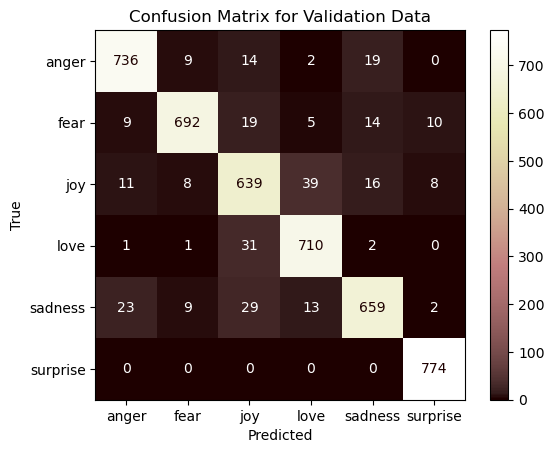

In [112]:
#confusion matrix for validation data
cm_val = confusion_matrix(y_val, y_val_pred_svm)
print("\nConfusion Matrix for Validation Data:")
print(cm_val)

#visualize confusion matrix for validation data
plt.figure(figsize=(8, 6))

#confusion matrix for validation data
cm_val_svm = confusion_matrix(y_val, y_val_pred_svm)

#confusion matrix for validation data
disp_val_svm = ConfusionMatrixDisplay(confusion_matrix=cm_val_svm, display_labels=svm_model.classes_)
disp_val_svm.plot(cmap=plt.cm.pink)
plt.title('Confusion Matrix for Validation Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Thank You